# 2. Statistics and visualisation

We have already cleaned the initial data set and now it is time to have a look on the values and try to make conclutions

In [195]:
import pandas as pd               
import numpy as np           
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns             
plt.style.use('ggplot')     
import matplotlib.dates as mdates

%matplotlib inline

In [140]:
df = pd.read_csv('clean_data_final01.csv')

In [141]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина
0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0
1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0
2,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0
3,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,0
4,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1 196,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219046 entries, 0 to 219045
Data columns (total 35 columns):
Дата                        219046 non-null object
ДатаДоставки                219046 non-null object
НомерЗаказаНаСайте          219046 non-null object
НовыйСтатус                 219046 non-null object
СуммаЗаказаНаСайте          219046 non-null int64
СуммаДокумента              219046 non-null object
МетодДоставки               219046 non-null object
ФормаОплаты                 219046 non-null object
Регион                      216439 non-null object
Группа2                     219046 non-null object
Группа3                     219046 non-null object
Группа4                     210219 non-null object
Тип                         219046 non-null object
Номенклатура                219046 non-null object
ТипТовара                   219046 non-null object
Отменено                    219046 non-null object
Количество                  219046 non-null int64
Цена                    

Firstly, we will calculate avarage value of a bill and avarage value of the marge of a bill. In order to do that we need to group rows of the dataframe by the number of the bill. 

In [245]:
df_by_bills = pd.read_csv('clean_data_drouped_by_bills.csv')

print('Number of unique bills:', len(df_by_bills))

Number of unique bills: 75632


In [246]:
df_by_bills['Revenue'].sum()

236885210.42000002

In [247]:
df_by_bills.head()

,Unnamed: 0,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Date,Hours,Weekday
0,0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,2017-03-04,9,5
1,1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2017-03-16,12,3
2,2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2017-03-18,18,5
3,3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2017-03-23,20,3
4,4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2017-03-24,10,4


In [252]:
df_by_hours = df_by_bills[['Revenue','Marge','Количество','Hours']].groupby('Hours').aggregate(sum)
df_by_weekday = df_by_bills[['Revenue','Marge','Количество','Weekday']].groupby('Weekday').aggregate(sum)

In [255]:
df_by_hours.to_csv('clean_data_grouped_by_hours.csv')
df_by_weekday.to_csv('clean_data_grouped_by_weekday.csv')

In [156]:

av_bill = df_by_bills['Revenue'].mean()
av_marge = df_by_bills['Marge'].mean()

print('Avarage bill:', av_bill)
print('Avarage marge:', av_marge)



Avarage bill: 3132.0765075629342
Avarage marge: 712.1206595092082


This values do not contradicts logic. However, mean value is representative if the distribution of the variable is close to normal. Outsiders can influense the mean value. Lets then look at the distribution of bills and marge in bills

In [157]:
med_bill = df_by_bills['Revenue'].median()
med_marge = df_by_bills['Marge'].median()

print('Avarage bill:', med_bill)
print('Avarage marge:', med_marge)

Avarage bill: 2050.0
Avarage marge: 310.45


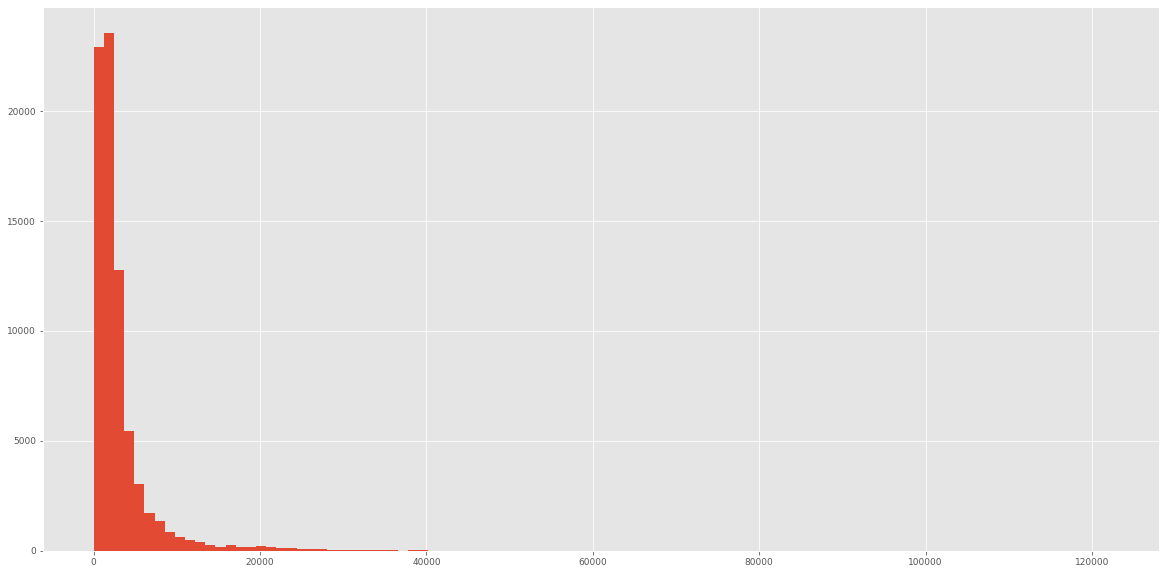

In [158]:
df_by_bills['Revenue'].hist(figsize=(20,10), bins = 100 );

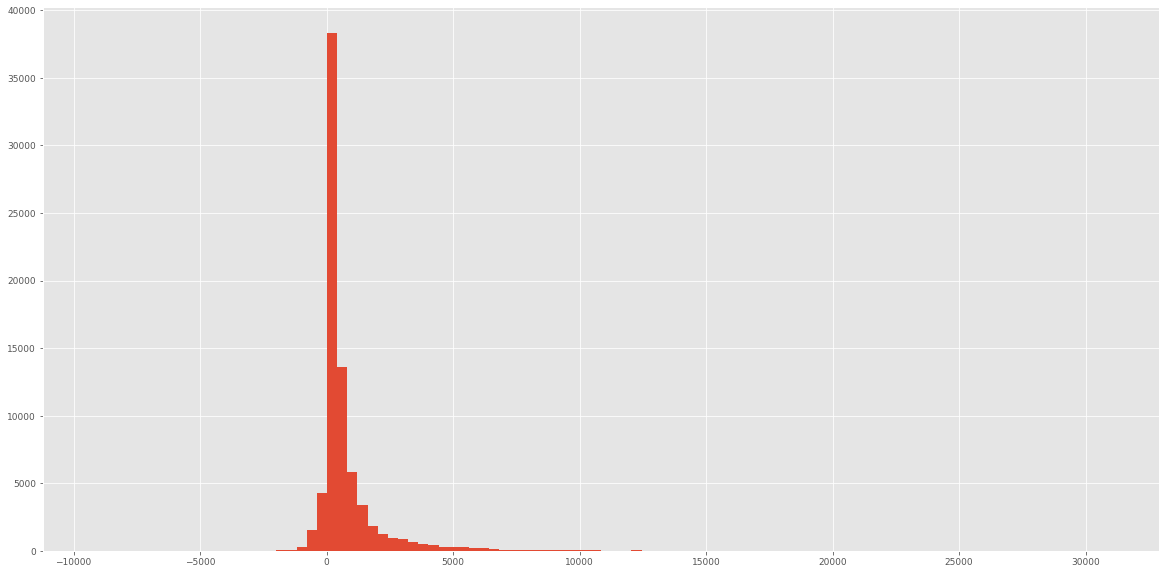

In [159]:
df_by_bills['Marge'].hist(figsize=(20,10), bins = 100 );

In [160]:
df_by_bills[['Revenue','Marge']].head()

,Revenue,Marge
0,247.0,63.08
1,13300.0,3246.00
2,16150.0,4436.07
3,4180.0,1345.00
4,18500.0,3400.00


In [172]:
df_by_bills['Revenue_ln'] = df_by_bills['Revenue']
df_by_bills['Marge_ln'] = df_by_bills['Marge']

In [175]:
df_by_bills[['Revenue_ln','Marge_ln']] = df_by_bills[['Revenue_ln','Marge_ln']].apply(lambda w: np.log(w + 1))
df_by_bills.replace([np.inf, -np.inf], np.nan).dropna(subset=['Revenue_ln','Marge_ln'], how="all")

,Unnamed: 0,НомерЗаказаНаСайте,Revenue,Marge,Количество,Дата,Revenue_ln,Marge_ln
0,0,1303000313_TR,247.0,63.08,1,04.03.2017 9:53,1.873866,1.640962
1,1,1303000319_TR,13300.0,3246.00,1,16.03.2017 12:58,2.350956,2.206678
2,2,1303000321_TR,16150.0,4436.07,1,18.03.2017 18:22,2.369284,2.240470
3,3,1303000323_TR,4180.0,1345.00,1,23.03.2017 20:01,2.234125,2.104731
4,4,1303000324_TR,18500.0,3400.00,1,24.03.2017 10:06,2.381912,2.211766
...,...,...,...,...,...,...,...,...
75627,75627,4513463_TR,1932.0,429.28,4,30.04.2017 23:48,2.147898,1.955073
75628,75628,4513474_TR,2002.0,558.57,10,30.04.2017 23:53,2.152041,1.991589
75629,75629,4513480_TR,4864.0,910.86,2,30.04.2017 23:58,2.250220,2.056107
75630,75630,4513486_TR,1436.0,-118.60,3,30.04.2017 23:58,2.112672,NaN


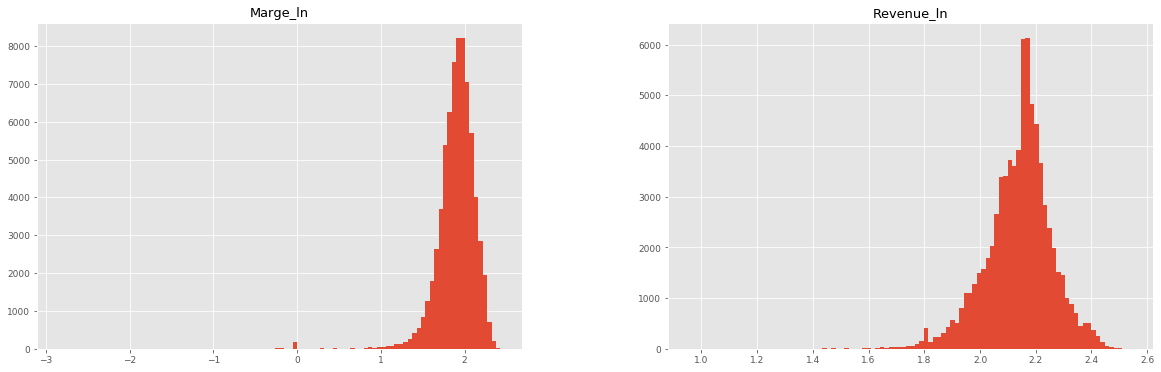

In [176]:
df_by_bills[['Revenue_ln','Marge_ln']].hist(figsize=(20,6), bins = 100 );

Now lets look how different catigoris of goods are distributed in our data set. What category of products are most often bought? Which category of products brings the most profit, that is, which category is the most marginal? For clarity, let's look at pie chars

In [79]:

def pieChar(data_names, data_values, title):
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
    mpl.rcParams.update({'font.size': 9})

    plt.title(title)

    xs = range(len(data_names))

    plt.pie(
        data_values, autopct='%.1f', radius = 1.1)
    plt.legend(
        bbox_to_anchor = (-0.16, 0.45, 0.25, 0.25),
        loc = 'lower left', labels = data_names )
    fig.savefig('pie.png')

In [80]:
type_set = df["Тип"].unique()

In [177]:
quantity_for_types = []
marge_for_types = []
revenue_for_types = []
for types in type_set:
    quantity_for_types.append(len(df[df["Тип"] == types]))
    marge_for_types.append(df[df["Тип"] == types]['Marge'].sum())
    revenue_for_types.append(df[df["Тип"] == types]['Revenue'].sum())

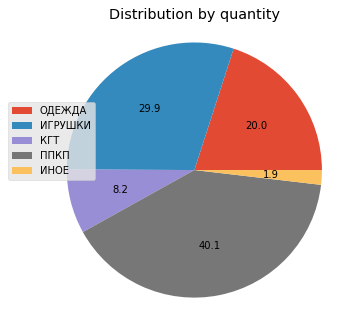

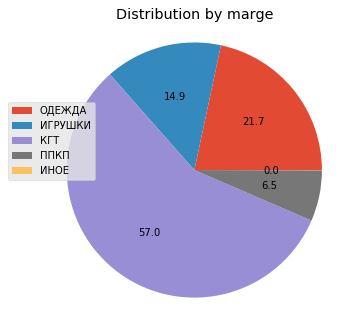

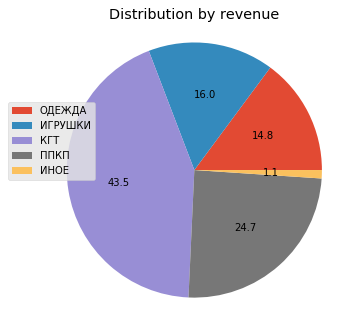

In [178]:
pieChar(type_set, quantity_for_types, 'Distribution by quantity')
pieChar(type_set, marge_for_types, 'Distribution by marge')
pieChar(type_set, revenue_for_types, 'Distribution by revenue')

In [225]:
df_by_bills.drop(['Unnamed: 0', 'Revenue_ln', 'Marge_ln'], axis='columns', inplace=True)

KeyError: "['Revenue_ln' 'Marge_ln'] not found in axis"

In [226]:
from datetime import datetime

In [228]:
df_by_dates = df_by_bills.groupby('Date').aggregate(sum)

num_unique_bills = []
for day in set(date):
    num_unique_bills.append(len(df_by_bills[df_by_bills['Date'] == day]))
    

In [234]:
df_by_bills['Date'] = pd.to_datetime(df_by_bills['Date'])

In [235]:
df_by_dates['UniqueBills'] = num_unique_bills


In [243]:
df_by_dates.to_csv('clean_data_drouped_by_dates.csv')

In [ ]:
#уникальные чеки, количество товаров, выручка, маржа